# South East Michigan Crash Dataset: Hypothesis Testing

The South East Michigan Traffic Crash Dataset is available on below website:

https://maps-semcog.opendata.arcgis.com/

The multi year dataset on Traffic Dataset has various information like Time Of Accident, Location, Injury, Distraction, DUI and others. My goal was to find any meaningful pattern from the dataset. I could see some clear patterns as I will be describing below but the problem I faced is define a Hypothesis which could be proved.

My initial try was finding a pattern and ask a questiion about Alchol and its relationship with accidents. However I could not ask any question which data could have answered (well, may be only question we could ask is when we could find DUI cases which I think has a clear winner that is after 10 pm)

My next try was in general to find any pattern in Crashes, overall. There are some patterns I could observed as follows:

1. Most accidents happens around 5 Pm.
2. Friday may be more accident prone day of the week.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

pd.options.mode.chained_assignment = None

In [2]:
#Read Crash Location From Spreadsheet.
crashLoc2011 = pd.read_csv('input/2011_Crash_Locations.csv')
crashLoc2012 = pd.read_csv('input/2012_Crash_Locations.csv')
crashLoc2013 = pd.read_csv('input/2013_Crash_Locations.csv')
crashLoc2014 = pd.read_csv('input/2014_Crash_Locations.csv')
crashLoc2015 = pd.read_csv('input/2015_Crash_Locations.csv')
crashLoc2016 = pd.read_csv('input/2016_Crash_Locations.csv')

Below, the 2011 crash data is loaded. I have particularly selected weekday and hour of accident. I have enumarated the week day which was little different than the usual python works. 

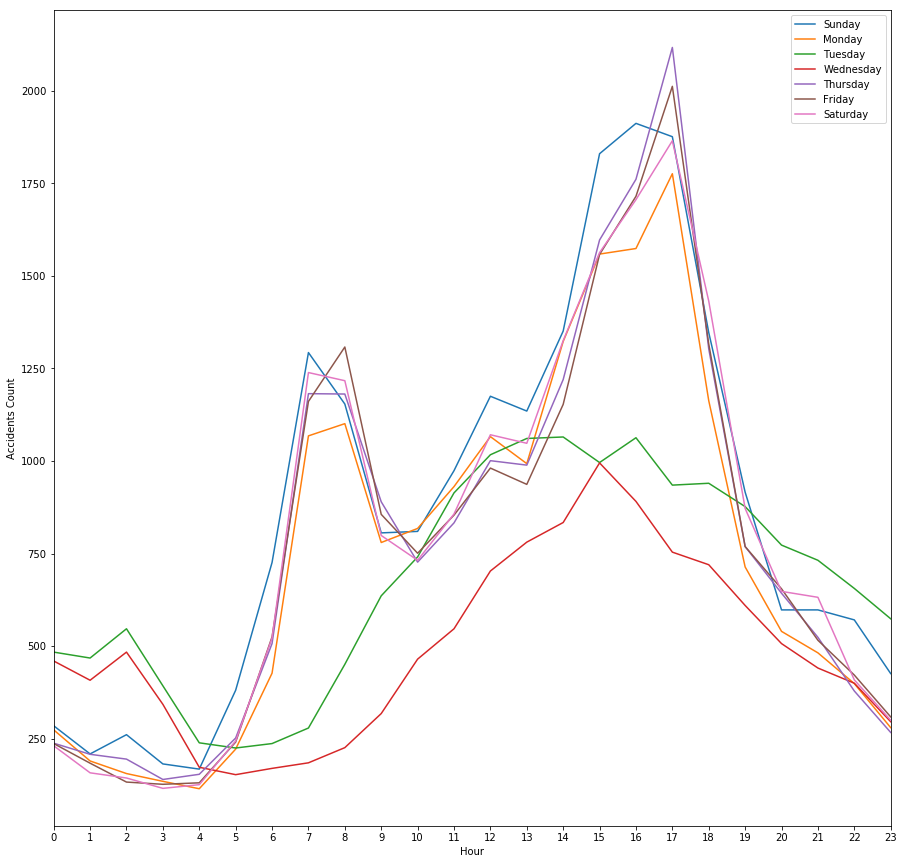

In [3]:
crash2011 = crashLoc2011[['hour','weekday']]

crash2011['dayofweek'] = pd.Series((n for n in crash2011.weekday), index=crash2011.index)

crash2011.loc[crash2011.dayofweek == 1, 'dayofweek'] = 'Sunday'
crash2011.loc[crash2011.dayofweek == 2, 'dayofweek'] = 'Monday'
crash2011.loc[crash2011.dayofweek == 3, 'dayofweek'] = 'Tuesday'
crash2011.loc[crash2011.dayofweek == 4, 'dayofweek'] = 'Wednesday'
crash2011.loc[crash2011.dayofweek == 5, 'dayofweek'] = 'Thursday'
crash2011.loc[crash2011.dayofweek == 6, 'dayofweek'] = 'Friday'
crash2011.loc[crash2011.dayofweek == 7, 'dayofweek'] = 'Saturday'

crash2011.set_index(['dayofweek','hour'], inplace=True)

grouped = crash2011.groupby(level=['dayofweek', 'hour']).size().reset_index(name='accidents')

ax = plt.subplot(111)
grouped[grouped.dayofweek.isin(['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday'])].groupby('dayofweek').plot(y='accidents', x='hour', kind='line',figsize=(15,15), ax=ax)
L = plt.legend()
_ = [plt.setp(item, 'text', T) for item, T in zip(L.texts, ['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday'])]
_ = ax.set_xticks(grouped.hour.unique())
_ = ax.set_ylabel("Accidents Count")
_ = ax.set_xlabel("Hour")
_ = ax.set_xlabel("Hour")

# Data Wrangling

From the above chart, it can be seen there three spikes - First at 7 AM, second at 8 AM and third is at 5 PM. Accidents on 5 Pm seems to be regular phenemenon.

But, what about which day of the week most accidents are happening? Can we see a trend here?

To do that, I have extracted "Week Of Year" and "Week Day Name" for every record. and then first ploted 2011 Weekly accidents counts.


In [4]:
#crash 2011 load
crash2011 = crashLoc2011[['hour','datetime', 'weekday']]
crash2011['weekofyear'] = pd.DatetimeIndex(crash2011['datetime']).weekofyear
crash2011['weekday_name'] = pd.DatetimeIndex(crash2011['datetime']).weekday_name

In [5]:
#crash 2012 load
crash2012 = crashLoc2012[['hour','datetime', 'weekday']]
crash2012['weekofyear'] = pd.DatetimeIndex(crash2012['datetime']).weekofyear
crash2012['weekday_name'] = pd.DatetimeIndex(crash2012['datetime']).weekday_name

In [24]:
#crash 2013 load
crash2013 = crashLoc2013[['hour','datetime', 'weekday']]
crash2013['weekofyear'] = pd.DatetimeIndex(crash2013['datetime']).weekofyear
crash2013['weekday_name'] = pd.DatetimeIndex(crash2013['datetime']).weekday_name

In [25]:
#crash 2014 load
crash2014 = crashLoc2014[['hour','datetime', 'weekday']]
crash2014['weekofyear'] = pd.DatetimeIndex(crash2014['datetime']).weekofyear
crash2014['weekday_name'] = pd.DatetimeIndex(crash2014['datetime']).weekday_name

In [26]:
#crash 2015 load
crash2015 = crashLoc2015[['hour','datetime', 'weekday']]
crash2015['weekofyear'] = pd.DatetimeIndex(crash2015['datetime']).weekofyear
crash2015['weekday_name'] = pd.DatetimeIndex(crash2015['datetime']).weekday_name


In [27]:
#crash 2016 load; rename column and align to the previous dataframe
crash2016 = crashLoc2016[['HOUR','DATE_FULL', 'WEEKDAY']]
crash2016 = crash2016.rename(columns= {'HOUR': 'hour', 'DATE_FULL': 'datetime', 'WEEKDAY': 'weekday'})
crash2016['weekofyear'] = pd.DatetimeIndex(crash2016['datetime']).weekofyear
crash2016['weekday_name'] = pd.DatetimeIndex(crash2016['datetime']).weekday_name

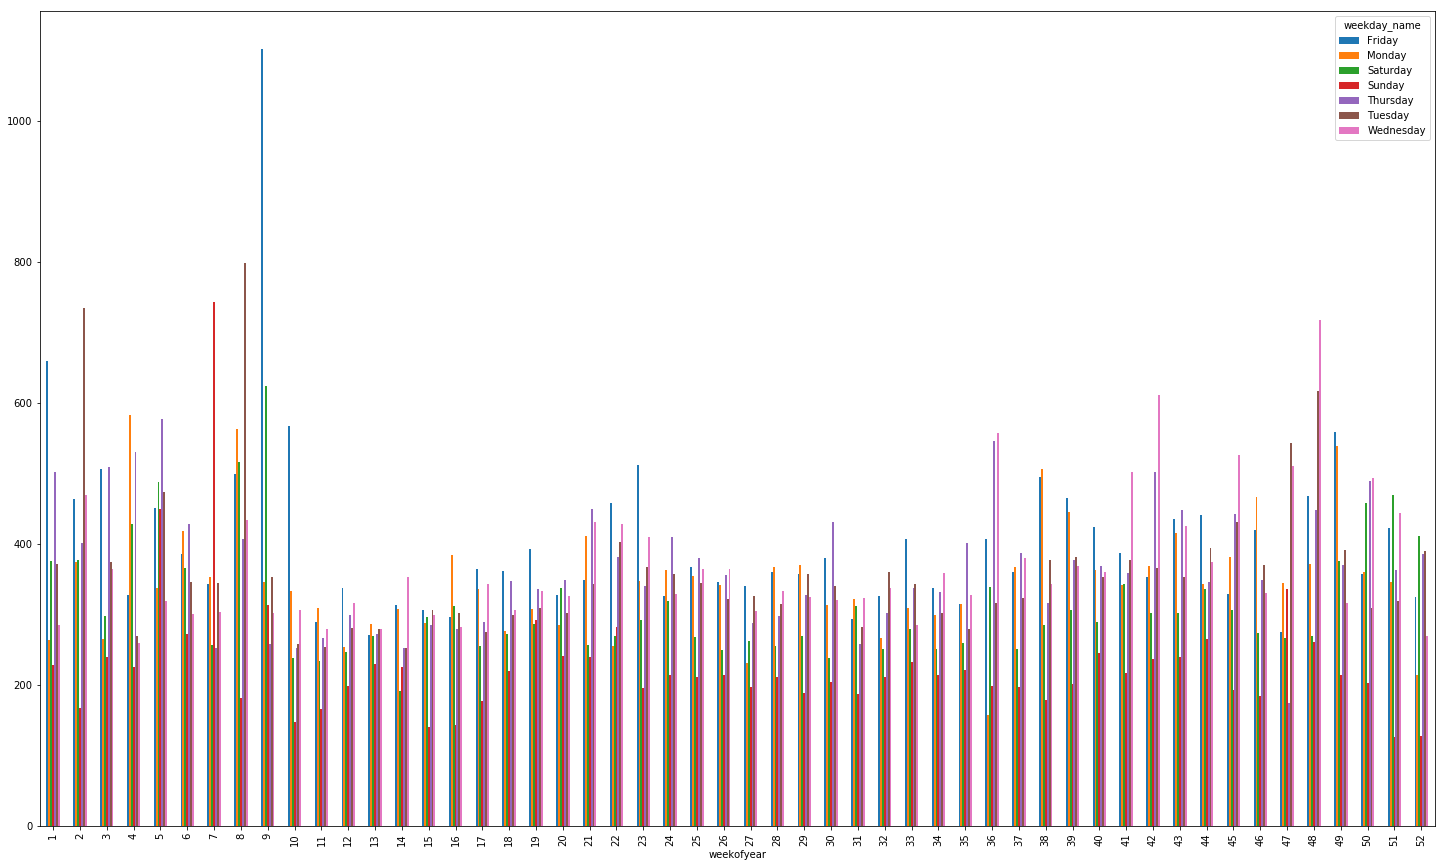

In [8]:
crash_by_weekday = crash2011[['weekday_name']] 
crash2011.set_index(['weekofyear','weekday_name'], inplace=True)
#crash2011[crash2011['weekday_name'] == 'Thursday']

grouped = crash2011.groupby(level=['weekofyear', 'weekday_name']).size().reset_index(name='accidents')
grouped.pivot(index='weekofyear', columns='weekday_name', values='accidents').plot(kind='bar',figsize=(25, 15))

# There are several spikes here and there. It is hard to understand or find any real pattern from above datasets.

In [11]:
crash_by_weekday.set_index('weekday_name', inplace=True)
grouped = crash_by_weekday.groupby('weekday_name').size().reset_index(name='accidents')
grouped.sort_values('accidents', inplace=True)

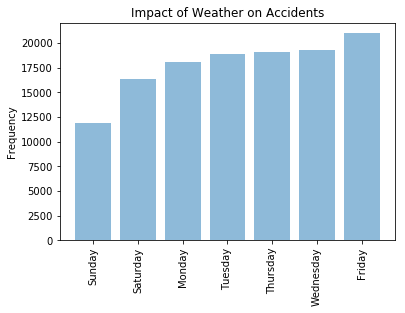

In [12]:
y_pos = np.arange(7)
plt.bar(y_pos, grouped.accidents, align='center', alpha=0.5, )
plt.xticks(y_pos,grouped.weekday_name,rotation='vertical')
plt.ylabel('Frequency')
plt.title('Accident occurences for individual weekdays')
 
plt.show()

The above bar char shows for 2011 which shows a sorted order on accident counts based on weekday. As can be seen, Friday most accidents happened.

# Defining Hypothesis:

The above chart is our base for analysis. So we really want to find an answer if Friday is the most accident prone day in South East Michigan. 

Our Null Hypothesis (Ho) : Friday is not the day when most accidents happens
Alternate Hypothesis (Ha) : Friday is the most accident prone day in South East Michigan.

We will do analysis by using t-test statistical significance level check. We will first compare 2011 samples with 2012 samples. We will find P Value. Then we will again compare with 2013 - 2016 samples and will observe the change of p-value.

Our alpha value .05 which is standard one.

In [15]:
grouped_2011 = crash2011.groupby(level=['weekofyear', 'weekday_name']).size().reset_index(name='accidents')

In [18]:
crash2012_by_weekday = crash2012[['weekofyear','weekday_name']]
crash2012_by_weekday.set_index(['weekofyear','weekday_name'], inplace=True)
grouped_2012 = crash2012_by_weekday.groupby(level=['weekofyear', 'weekday_name']).size().reset_index(name='accidents')

In [23]:
from scipy.stats import ttest_ind

cat11 = grouped_2011[grouped_2011['weekday_name'] == 'Friday']
cat12 = grouped_2012[grouped_2012['weekday_name'] == 'Friday']

ttest_ind(cat11.accidents, cat12.accidents)

Ttest_indResult(statistic=-0.31891894411632127, pvalue=0.75044014552071125)

# The P value is .75 which means 75% chance that this 2 samples are related by chance. This is way more than we want. but what happens when we compare with larger samples.

# Below some more Data Wrangling to merge datasets.

In [35]:
crash2013_by_weekday = crash2013[['weekofyear','weekday_name']]
crash2014_by_weekday = crash2014[['weekofyear','weekday_name']]
crash2015_by_weekday = crash2015[['weekofyear','weekday_name']]
crash2016_by_weekday = crash2016[['weekofyear','weekday_name']]

In [36]:
crash2013_by_weekday['year'] = 2013
crash2014_by_weekday['year'] = 2014
crash2015_by_weekday['year'] = 2015
crash2016_by_weekday['year'] = 2016

In [37]:
crash2013_by_weekday.set_index(['year','weekofyear','weekday_name'], inplace=True)
crash2014_by_weekday.set_index(['year','weekofyear','weekday_name'], inplace=True)
crash2015_by_weekday.set_index(['year','weekofyear','weekday_name'], inplace=True)
crash2016_by_weekday.set_index(['year','weekofyear','weekday_name'], inplace=True)

In [38]:
merged_data = pd.concat([crash2013_by_weekday,crash2014_by_weekday, crash2015_by_weekday, crash2016_by_weekday], axis=0)

In [41]:
grouped_all = merged_data.groupby(level=['year','weekofyear', 'weekday_name']).size().reset_index(name='accidents')

In [42]:
cat11 = grouped_2011[grouped_2011['weekday_name'] == 'Friday']
cat12 = grouped_all[grouped_all['weekday_name'] == 'Friday']

ttest_ind(cat11.accidents, cat12.accidents)

Ttest_indResult(statistic=-1.4545167761582904, pvalue=0.14701388322082043)

# Now, we could see there is a drastic change in p-value. Earlier it was .75 to .14 which means with more data it is normalized. 

As a Final thought, I would like to explore more on this using other hypothesis testing like Permutation etc. 